# **Model Training**

In [60]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, confusion_matrix, auc
import tensorflow
from tensorflow import keras

In [2]:
# Data Ingestion 
df = pd.read_excel('data/churn_data_updated.xlsx')

In [5]:
# Segregating Independent features (X) and the target variable (y)
X = df.drop('Churn', axis = 1)
y = df[['Churn']]

In [8]:
# Performing Test and Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (70000, 10)
X_test: (30000, 10)
y_train: (70000, 1)
y_test: (30000, 1)


In [9]:
# Defining all the models simultaneously in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XgBoost': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

In [15]:
def evaluate_model(X_train, X_test, y_train, y_test, models):
    assessment = {}
    y_test = y_test.values.ravel()
    y_train = y_train.values.ravel()
    for model_name in models:
        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        assessment[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        } 
    return assessment

In [16]:
assessment_report = evaluate_model(X_train, X_test, y_train, y_test, models)

In [17]:
assessment_report

{'Logistic Regression': {'Accuracy': 0.5002666666666666,
  'Precision': 0.49727708688937655,
  'Recall': 0.40991624790619763},
 'SVC': {'Accuracy': 0.5036,
  'Precision': 0.506145251396648,
  'Recall': 0.09105527638190955},
 'Decision Tree': {'Accuracy': 0.5045666666666667,
  'Precision': 0.502071638599305,
  'Recall': 0.5033835845896147},
 'Random Forest': {'Accuracy': 0.4922666666666667,
  'Precision': 0.4893881783615624,
  'Recall': 0.47430485762144053},
 'XgBoost': {'Accuracy': 0.5036666666666667,
  'Precision': 0.5014129995962858,
  'Recall': 0.41608040201005025},
 'Naive Bayes': {'Accuracy': 0.49883333333333335,
  'Precision': 0.4953951774949766,
  'Recall': 0.3964489112227806}}

In [22]:
sorted_report = sorted(assessment_report.items(), key=lambda x: (x[1]['Recall'], x[1]['Accuracy']), reverse=True)
print(sorted_report)
best_model = sorted_report[0][0]
print(f'Our best model is {best_model}')

[('Decision Tree', {'Accuracy': 0.5045666666666667, 'Precision': 0.502071638599305, 'Recall': 0.5033835845896147}), ('Random Forest', {'Accuracy': 0.4922666666666667, 'Precision': 0.4893881783615624, 'Recall': 0.47430485762144053}), ('XgBoost', {'Accuracy': 0.5036666666666667, 'Precision': 0.5014129995962858, 'Recall': 0.41608040201005025}), ('Logistic Regression', {'Accuracy': 0.5002666666666666, 'Precision': 0.49727708688937655, 'Recall': 0.40991624790619763}), ('Naive Bayes', {'Accuracy': 0.49883333333333335, 'Precision': 0.4953951774949766, 'Recall': 0.3964489112227806}), ('SVC', {'Accuracy': 0.5036, 'Precision': 0.506145251396648, 'Recall': 0.09105527638190955})]
Our best model is Decision Tree


Now we have to hypertune our Decision Tree model.

In [49]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 6, 7, 8, 9]
}

In [50]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5, verbose = True)

In [51]:
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=True)

In [52]:
gridSearch.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

In [53]:
decision = DecisionTreeClassifier(criterion='gini', max_depth = 9, splitter = 'best')
decision.fit(X_train, y_train)
y_predict = gridSearch.predict(X_test)

In [54]:
accuracy_score(y_test, y_predict)

0.5022333333333333

In [55]:
recall_score(y_test, y_predict)

0.5203350083752094

In [41]:
confusion_matrix(y_test, y_predict)

array([[9925, 5150],
       [9955, 4970]], dtype=int64)

[Text(0.4907760814249364, 0.95, 'x[3] <= 94.595\n0.5\n70000\n[35146, 34854]'),
 Text(0.27131043256997456, 0.85, 'x[3] <= 94.575\n0.5\n64600\n[32551, 32049]'),
 Text(0.15330788804071246, 0.75, 'x[4] <= 58.5\n0.5\n64579\n[32534, 32045]'),
 Text(0.045483460559796435, 0.65, 'x[3] <= 38.275\n0.498\n1358\n[638, 720]'),
 Text(0.02099236641221374, 0.55, 'x[3] <= 37.785\n0.479\n189\n[75, 114]'),
 Text(0.018447837150127225, 0.45, 'x[4] <= 51.5\n0.485\n181\n[75, 106]'),
 Text(0.007633587786259542, 0.35, 'x[0] <= 23.0\n0.497\n39\n[21, 18]'),
 Text(0.005089058524173028, 0.25, '0.0\n6\n[6, 0]'),
 Text(0.010178117048346057, 0.25, 'x[3] <= 35.615\n0.496\n33\n[15, 18]'),
 Text(0.005089058524173028, 0.15, 'x[2] <= 21.0\n0.486\n24\n[14, 10]'),
 Text(0.002544529262086514, 0.05, '0.432\n19\n[13, 6]'),
 Text(0.007633587786259542, 0.05, '0.32\n5\n[1, 4]'),
 Text(0.015267175572519083, 0.15, 'x[3] <= 37.655\n0.198\n9\n[1, 8]'),
 Text(0.01272264631043257, 0.05, '0.0\n8\n[0, 8]'),
 Text(0.017811704834605598, 0.0

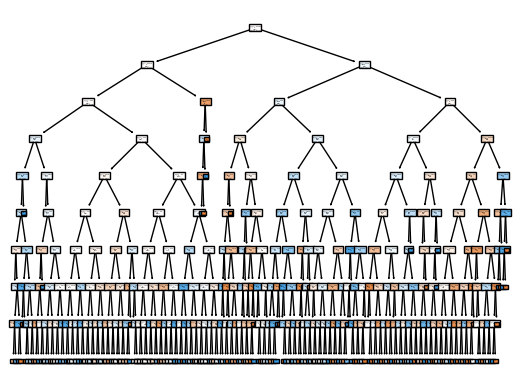

In [59]:
plot_tree(decision_tree= decision, label = 'none', filled = True)

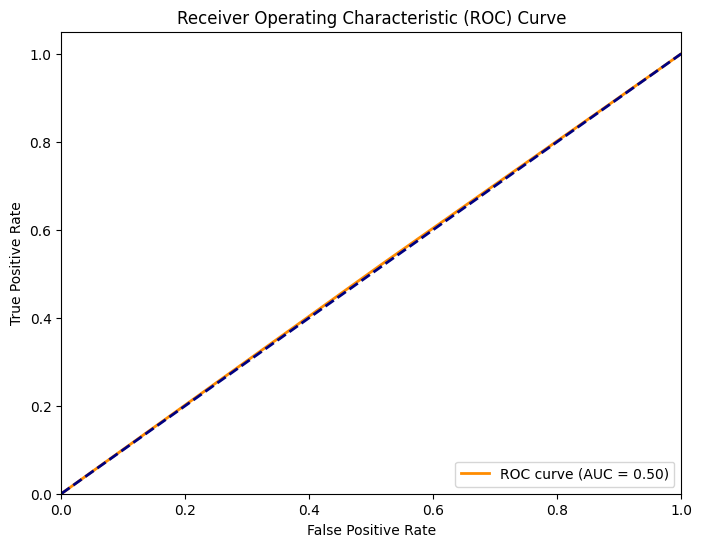

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Epoch 1/100
956/956 [==============================] - 3s 2ms/step - loss: 0.6969 - accuracy: 0.5014 - val_loss: 0.6943 - val_accuracy: 0.4940
Epoch 2/100
956/956 [==============================] - 2s 2ms/step - loss: 0.6935 - accuracy: 0.5060 - val_loss: 0.6938 - val_accuracy: 0.4855
Epoch 3/100
956/956 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5136 - val_loss: 0.6939 - val_accuracy: 0.5011
Epoch 4/100
956/956 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5107 - val_loss: 0.6943 - val_accuracy: 0.4929
Epoch 5/100
956/956 [==============================] - 2s 2ms/step - loss: 0.6925 - accuracy: 0.5146 - val_loss: 0.6955 - val_accuracy: 0.4880
Epoch 6/100
956/956 [==============================] - 2s 2ms/step - loss: 0.6926 - accuracy: 0.5127 - val_loss: 0.6953 - val_accuracy: 0.4890
Epoch 7/100
956/956 [==============================] - 2s 2ms/step - loss: 0.6925 - accuracy: 0.5165 - val_loss: 0.6954 - val_accuracy: 0.4860

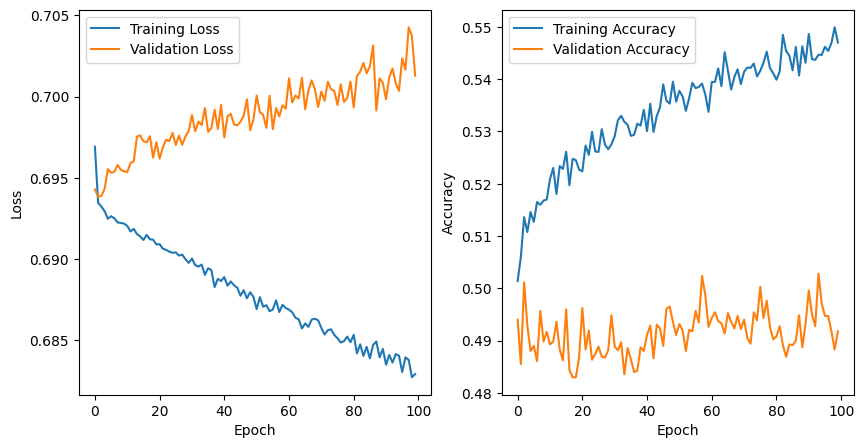

In [65]:
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize your input features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create a sequential neural network model
model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_shape=(10,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_val, y_val))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


So finally, after implementing all the possible models we came to know that Decision tree classifier is the best model. However the accuracy is around 50% even after hypertuning.